In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20 
import json
import random

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
def get_results(txt_file, number=15):
    # Using readlines()
    file1 = open(txt_file, 'r')
    Lines = file1.readlines()
    results = []
    for line in Lines:
        if line[0] == 'e':
            result_1 = [_.start() for _ in re.finditer(':', line)] 
            result_2 = [_.start() for _ in re.finditer(',', line)] + [-3]
            bla = []
            for i in range(number):
                if i == number-1:
                    bla.append(float(line[result_1[i]+2:]))
                else:
                    bla.append(float(line[result_1[i]+2:result_2[i]]))
                    
                
            results.append(bla)

    results = np.array(results)
    return results

In [4]:
exp_020 = get_results('./exp_020/log.txt', 7)

In [5]:
l=1 #average over l epochs

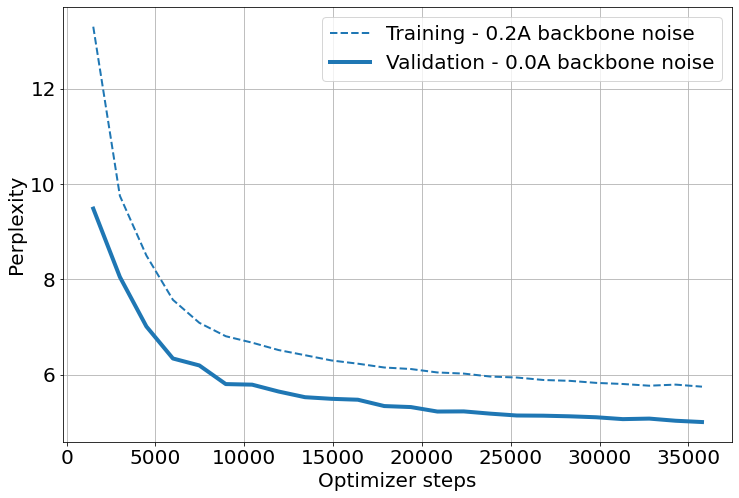

In [6]:
plt.figure(figsize=(12,8))

plt.plot(running_mean(exp_020[:,1],l), running_mean(exp_020[:,3],l), '--', linewidth=2.0, c='C0')
plt.plot(running_mean(exp_020[:,1],l), running_mean(exp_020[:,4],l), linewidth=4.0, c='C0')

plt.xlabel('Optimizer steps')
plt.ylabel('Perplexity')
plt.grid(True)
plt.legend(['Training - 0.2A backbone noise','Validation - 0.0A backbone noise'] )

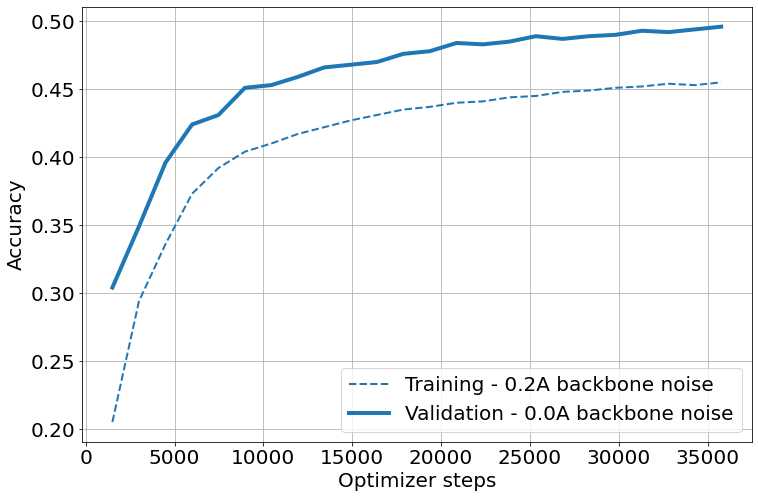

In [7]:
plt.figure(figsize=(12,8))
k = 5

plt.plot(running_mean(exp_020[:,1],l), running_mean(exp_020[:,5],l), '--', linewidth=2.0, c='C0')
plt.plot(running_mean(exp_020[:,1],l), running_mean(exp_020[:,6],l), linewidth=4.0, c='C0')

plt.xlabel('Optimizer steps')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(['Training - 0.2A backbone noise','Validation - 0.0A backbone noise'] )